In [ ]:
from tensorflow.keras.models import Model
from keras.layers import Input
from random import randint
import tensorflow as tf
import numpy as np
import sklearn
import random

In [67]:
from functions import (augmentation, my_callback, upsample,
                       confusion_matrix, plot_images_labels, evaluate_model)
from history_visu import visualize_loss_accuary
from model_architecture import build_model
from keras.utils import to_categorical

ImportError: cannot import name 'upsample' from 'functions' (c:\Users\reza\Desktop\Handwritten digit recognition\demo_codes\new repository\functions.py)

In [62]:
tf.random.set_seed(123)
np.random.seed(123)
random.seed(123)
size = 128

In [63]:
# # mounting drive
# from google.colab import drive
# drive.mount('/content/drive')

In [64]:
data = np.load(r"C:\Users\reza\Desktop\Handwritten digit recognition\demo_codes\new repository\Datasets\Tibetan_train_test.npz")
X_train = data['X_train']
Y_train = data['y_train']
X_test = data['X_test']
Y_test = data['y_test']

In [ ]:
X_train = upsample(X_train, size)
X_test = upsample(X_test, size)
X_train.shape

In [9]:
X_train, Y_train = sklearn.utils.shuffle(X_train, Y_train)

In [10]:
X_val = X_train[:10000]
Y_val = Y_train[:10000]
X_train = X_train[10000:]
Y_train = Y_train[10000:]

In [11]:
print(X_val.shape)
print(Y_val.shape)
print(X_train.shape)
print(Y_train.shape)

(10000, 128, 128)
(10000,)
(4214, 128, 128)
(4214,)


In [12]:
augmented_images, augmented_labels = augmentation([-30, 0, 30], X_train, Y_train, size)

(12642, 128, 128)
(12642,)


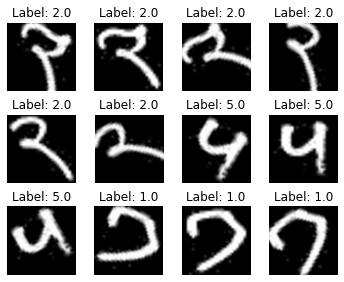

In [13]:
plot_images_labels(augmented_images, augmented_labels)

In [14]:
X_train, Y_train = sklearn.utils.shuffle(augmented_images, augmented_labels)

In [15]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)

In [16]:
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)
Y_val = to_categorical(Y_val, 10)

In [17]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(12642, 128, 128, 1)
(12642, 10)
(3554, 128, 128, 1)
(3554, 10)


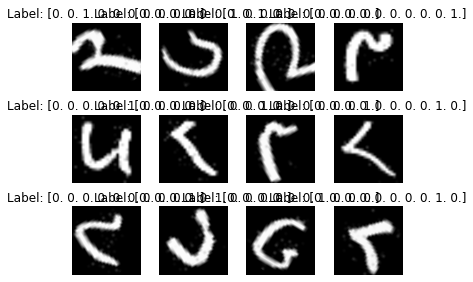

In [18]:
plot_images_labels(X_train, Y_train)

In [19]:
X_train.shape

(12642, 128, 128, 1)

In [22]:
input_layer = Input(X_train[0].shape)
model = Model(inputs=input_layer, outputs=build_model(input_layer))
model.summary()
model.compile(loss = 'categorical_crossentropy',optimizer = "adam",  metrics = ['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 64)         640       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 128, 128, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 64)         36928     ['batch_normalization[0][0

In [23]:
filepath = "/content/drive/MyDrive/SavedModels/Classifier/model_1/epochs/sample{epoch:03d}-val_acc_{val_accuracy}.hdf5"

In [27]:
history = model.fit(X_train[:2], Y_train[:2],batch_size = 32, epochs = 1, verbose  = 1,  validation_split= 0.2, callbacks = [my_callback(filepath)])

1/1 [==============================] - ETA: 0s - loss: 2.0078 - accuracy: 0.0000e+00

C:\Users\reza\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 1s/step - loss: 2.0078 - accuracy: 0.0000e+00 - val_loss: 0.0312 - val_accuracy: 1.0000


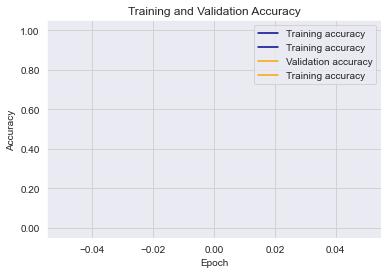

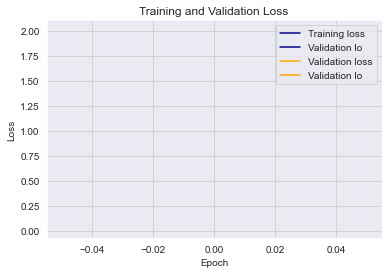

In [31]:
visualize_loss_accuary(history)

In [49]:
evaluate_model(X_test[:1], Y_test[:1], model)

Test loss: 0.18812768161296844
Test accuracy: 1.0


In [ ]:
model.save("/content/drive/MyDrive/SavedModels/Classifier/model_1/model_test_111")

In [ ]:
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/SavedModels/Classifier/model_1/epochs/sample013-val_acc_0.9847579002380371.hdf5")

In [55]:
Y_hat = model.predict(X_test[:5])

1/1 [==============================] - 0s 220ms/step


In [56]:
print(Y_hat)
print(Y_test[:5])

[[2.5036615e-23 8.2851642e-01 7.1069828e-38 2.4664026e-19 0.0000000e+00
  3.4409387e-29 1.3627824e-21 0.0000000e+00 1.7148352e-01 0.0000000e+00]
 [7.4965615e-20 9.0988211e-02 1.0412324e-32 5.7145702e-09 0.0000000e+00
  8.1033148e-25 4.1317241e-14 0.0000000e+00 9.0901178e-01 0.0000000e+00]
 [1.9715250e-19 2.9767007e-08 1.1436856e-33 9.9999928e-01 0.0000000e+00
  3.1173818e-21 8.4266268e-15 3.2496952e-38 6.6618435e-07 5.1100925e-37]
 [1.5344219e-17 1.5395459e-10 9.0935120e-32 1.0521647e-02 1.7228985e-28
  5.9342205e-15 9.8947829e-01 0.0000000e+00 1.2784298e-08 0.0000000e+00]
 [1.7133976e-16 3.1553599e-20 0.0000000e+00 1.0000000e+00 0.0000000e+00
  3.5600103e-31 1.2545422e-18 0.0000000e+00 7.6422919e-18 0.0000000e+00]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
confusion_matrix(Y_hat[:5], Y_test[:5])